# Example 3.8  Fast Fourier Transform (FFT) of a Time Series

## 1. Introduction

The **Fast Fourier Transform (FFT)** is an efficient algorithm for computing the **Discrete Fourier Transform (DFT)**, which transforms a discrete signal from the time domain to the frequency domain.

Consider a time series $x(t)$. In practice, we have a discrete signal (i.e., a "list" of $N$ samples with time step $\Delta t$):

$$
\Big[ x(t=0) \: , \: x(t=\Delta t) \: , \:  x(t=2 \Delta t) \: , \:  x(t=3\Delta t) \: , \:  \dots \: , \:  x(t=(N-1) \Delta t) \Big]
\quad
\text{or}
\quad
\Big[ x[0] \: , \: x[1] \: , \: x[2] \: , \: x[3] \: , \: \dots \: , \: x[(N-1)] \Big]
$$

$$
X[k] = \frac{1}{N} \sum_{n=0}^{N-1} x[n] \, e^{-j 2\pi k n / N}, \quad k = 0, 1, \dots, N-1
$$

The corresponding inverse transform is:

$$
x[n] = \sum_{k=0}^{N-1} X[k] \, e^{j 2\pi k n / N}
$$

The FFT provides the same result as the DFT, but with far less computational effort.

## 2. Time-Domain Signal

Let's create a signal that is the sum of two sinusoids with different frequencies.


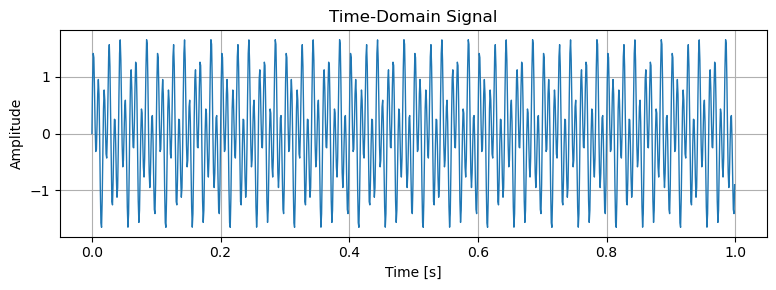

In [32]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
dt=0.001  # Sampling frequency [Hz]
N = 1000  # Number of samples
t = np.arange(N) * dt  # Time vector

# Signal: sum of two sinusoids
f1, f2 = 50, 120  # frequencies [Hz]
x = 0.7*np.sin(2*np.pi*f1*t) + 1.0*np.sin(2*np.pi*f2*t)

# Plot time-domain signal
plt.figure(figsize=(8, 3))
plt.plot(t, x, linewidth=1)
plt.title('Time-Domain Signal')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.grid(True)
plt.tight_layout()
plt.show()


---

## 3. Compute the FFT

We compute the FFT using NumPy's `np.fft.fft` function.  
The result `X` is a complex-valued array representing both amplitude and phase. The corresponding frequency vector is:

$$
f[k] = \frac{k}{N} f_s, \quad k = 0, 1, \dots, N-1
$$

where $f_s=1/\Delta t$ is the *sample rate*. In this example, $\Delta t=0.001$ s, so $f_s=1000$ Hz.


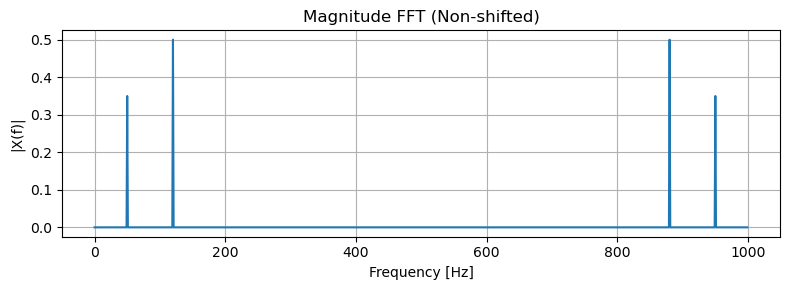

In [33]:
# Compute FFT
X = 1/N*np.fft.fft(x)

# Frequency vector (non-shifted)
f = np.arange(N) * fs / N

# Plot the non-shifted FFT
plt.figure(figsize=(8,3))
plt.plot(f, np.abs(X))
plt.title('Magnitude FFT (Non-shifted)')
plt.xlabel('Frequency [Hz]')
plt.ylabel('|X(f)|')
plt.grid(True)
plt.tight_layout()
plt.show()


We see that the peaks at 50 Hz and 120 Hz are present, but we also have something at higher frequencies. This is because a sinusoid at frequency 
$f$ and another at $f_s-f$ produce the exact same sampled signal (they are aliases of each other). Therefore, what appears as a high-frequency component near $f_s-f$ is not a new physical frequency, but rather the negative-frequency mirror of the true component at $f$. We therefore have to introduce a frequency shift.

---

## 4. Understanding FFT Shift

In the raw FFT result, the **zero frequency component (DC)** is located at index `0`, and the frequencies increase up to $ f_s $ (the sampling frequency).  
For visualization, it is often more intuitive to **shift** the FFT so that zero frequency is centered, and negative frequencies appear on the left.

Mathematically, the shifted version is:

$$
X_{\text{shifted}}[k] = X[(k + N/2) \mod N]
$$

In NumPy, this is done with `np.fft.fftshift`. The corresponding frequency vector then runs from $-f_s/2$ to $+f_s/2$.


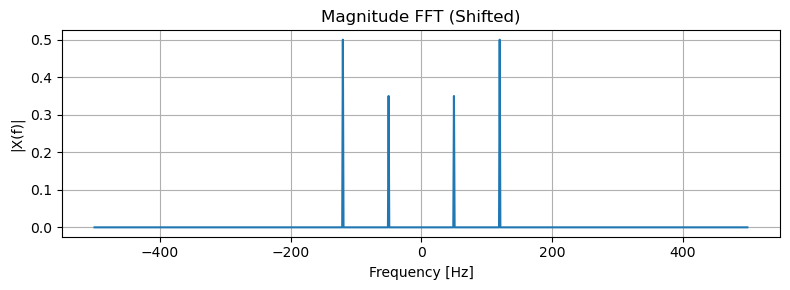

In [34]:
# Shift FFT and frequency vector
X_shifted = 1/N*np.fft.fftshift(np.fft.fft(x))
f_shifted = np.fft.fftshift(np.fft.fftfreq(N,d=dt))

# Plot shifted FFT
plt.figure(figsize=(8,3))
plt.plot(f_shifted, np.abs(X_shifted))
plt.title('Magnitude FFT (Shifted)')
plt.xlabel('Frequency [Hz]')
plt.ylabel('|X(f)|')
plt.grid(True)
plt.tight_layout()
plt.show()


---

## 5. Comparison of Shifted vs Non-Shifted FFT

To clearly see the difference, let's plot both versions side by side.


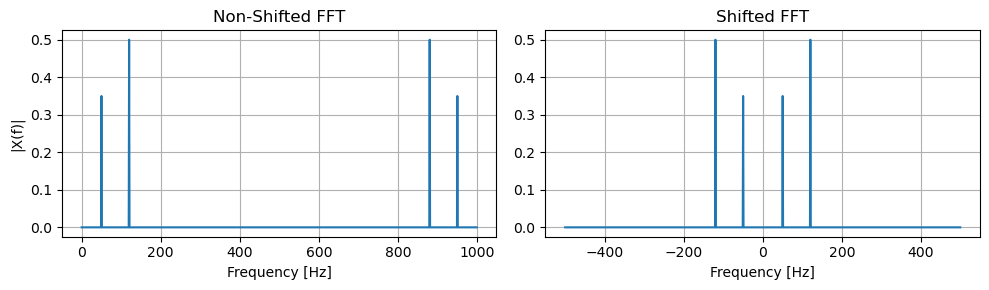

In [35]:
fig, axes = plt.subplots(1, 2, figsize=(10, 3))

# Non-shifted
axes[0].plot(f, np.abs(X))
axes[0].set_title('Non-Shifted FFT')
axes[0].set_xlabel('Frequency [Hz]')
axes[0].set_ylabel('|X(f)|')
axes[0].grid(True)

# Shifted
axes[1].plot(f_shifted, np.abs(X_shifted))
axes[1].set_title('Shifted FFT')
axes[1].set_xlabel('Frequency [Hz]')
axes[1].grid(True)

plt.tight_layout()
plt.show()


---

## 6. Summary

- The FFT transforms a discrete time-domain signal into its frequency-domain representation.
- The **non-shifted FFT** starts at zero frequency and extends to the sampling frequency $ f_s $.
- The **FFT shift** centers the FFT at zero, displaying both positive and negative frequencies, which is more physically interpretable.
- The peaks in the plots correspond to the sinusoidal components of the signal (here at 50 Hz and 120 Hz).

